In [ ]:
!pip install pycaret

Collecting diamond dataset from datasets available in Pycaret

In [2]:
from pycaret.datasets import get_data
dataset = get_data('diamond')

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


In [3]:
# Checking if there are any missing values
dataset.isna().sum()

Carat Weight    0
Cut             0
Color           0
Clarity         0
Polish          0
Symmetry        0
Report          0
Price           0
dtype: int64

In [4]:
# Creating samples of data which then can be used for training
data = dataset.sample(frac=0.9, random_state=786)
data.head()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
5333,1.50,Good,E,VS2,VG,G,GIA,12702
3749,1.08,Ideal,D,VS2,EX,EX,GIA,8481
2376,2.25,Good,I,VS2,G,VG,GIA,18623
3756,2.27,Very Good,G,VS2,VG,VG,GIA,27252
4248,1.20,Ideal,F,VS1,EX,EX,GIA,9641


In [5]:
# Creating data for testing
data_unseen = dataset.drop(data.index)
data_unseen.head()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
5,1.53,Ideal,E,SI1,ID,ID,AGSL,12791
7,1.50,Fair,F,SI1,VG,VG,GIA,10450
11,1.01,Good,E,SI1,G,G,GIA,5161
13,2.51,Very Good,G,VS2,VG,VG,GIA,34361
18,1.01,Good,I,SI1,VG,VG,GIA,4238


In [6]:
# Index values are now not in order, resetting them
data.reset_index(inplace=True)
data_unseen.reset_index(inplace=True)

Pycaret environment needs to be setup first before doing any activities. This would further help in comparing models for our dataset and evaluating each model. All functions of pycaret can be used once the environment is setup.

In [7]:
# Setting the pycaret Environment
from pycaret.regression import *
reg = setup(data=data, target='Price', session_id=111)

,Description,Value
0,session_id,111
1,Target,Price
2,Original Data,"(5400, 9)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,6
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(3779, 29)"


Comparing different models based on their accuracy and then shortlisting these models

In [8]:
# Comparing models
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,745.9936,2.360362e+06,1507.2328,0.9781,0.0803,0.0600,1.385
rf,Random Forest Regressor,781.5726,3.038127e+06,1695.9778,0.9717,0.0832,0.0612,1.444
gbr,Gradient Boosting Regressor,918.1396,3.422215e+06,1833.0239,0.9681,0.1014,0.0771,0.351
lightgbm,Light Gradient Boosting Machine,799.3693,3.516913e+06,1837.9523,0.9672,0.0820,0.0591,0.129
dt,Decision Tree Regressor,1049.1744,5.165386e+06,2224.5616,0.9512,0.1114,0.0814,0.037
ridge,Ridge Regression,2525.6706,1.477458e+07,3831.2936,0.8616,0.6619,0.3014,0.017
lasso,Lasso Regression,2521.4325,1.478832e+07,3835.2137,0.8611,0.6594,0.3005,0.037
lr,Linear Regression,2523.8812,1.479087e+07,3835.9665,0.8610,0.6559,0.3011,0.291
llar,Lasso Least Angle Regression,2466.7444,1.481818e+07,3837.6409,0.8610,0.6866,0.2867,0.018
lar,Least Angle Regression,2587.3619,1.575714e+07,3957.7673,0.8501,0.6528,0.3077,0.022


In [9]:
# These are all the models available in Pycaret for model creation
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [10]:
# Creating the model for Random Forest
rf = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,843.1462,3.888562e+06,1971.9438,0.9683,0.0905,0.0642
1,784.0719,2.616007e+06,1617.4075,0.9753,0.0904,0.0672
2,760.8828,2.295123e+06,1514.9662,0.9766,0.0798,0.0591
3,688.1770,2.355284e+06,1534.6934,0.9747,0.0801,0.0594
4,876.5402,7.430110e+06,2725.8227,0.9328,0.0894,0.0623
5,751.4709,1.651190e+06,1284.9865,0.9830,0.0765,0.0593
6,735.8621,1.837275e+06,1355.4613,0.9844,0.0763,0.0570
7,805.0246,2.354645e+06,1534.4852,0.9790,0.0812,0.0608
8,838.4310,3.759561e+06,1938.9588,0.9677,0.0864,0.0630
9,732.1196,2.193515e+06,1481.0521,0.9753,0.0816,0.0594


In [21]:
# Creating the model for extra tress regressor
et = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,778.7993,2.869911e+06,1694.0813,0.9766,0.0922,0.0628
1,774.7749,2.039823e+06,1428.2237,0.9807,0.0863,0.0660
2,743.2684,1.961282e+06,1400.4577,0.9800,0.0799,0.0593
3,668.2994,1.615772e+06,1271.1303,0.9826,0.0747,0.0580
4,761.4922,4.223040e+06,2055.0036,0.9618,0.0815,0.0602
5,736.6401,1.390527e+06,1179.2059,0.9857,0.0752,0.0586
6,719.5428,1.906212e+06,1380.6562,0.9838,0.0757,0.0570
7,783.1594,2.075836e+06,1440.7763,0.9815,0.0798,0.0598
8,820.2737,4.065780e+06,2016.3779,0.9650,0.0828,0.0617
9,673.6854,1.455438e+06,1206.4152,0.9836,0.0746,0.0562


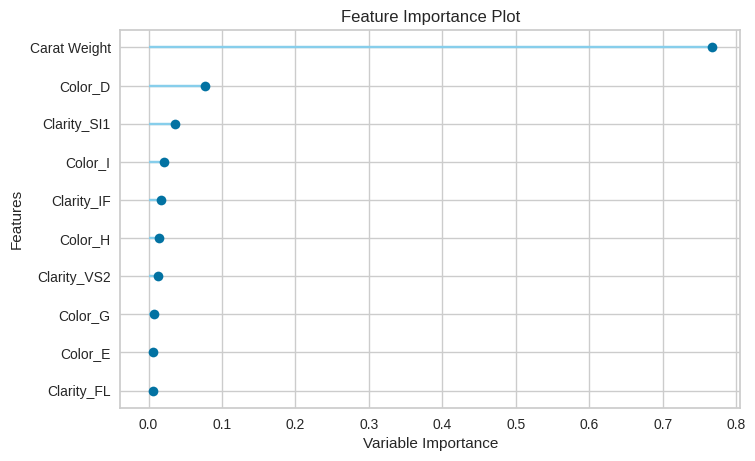

In [11]:
# Plotting the random forest model with feature importance
plot_model(rf, plot='feature')

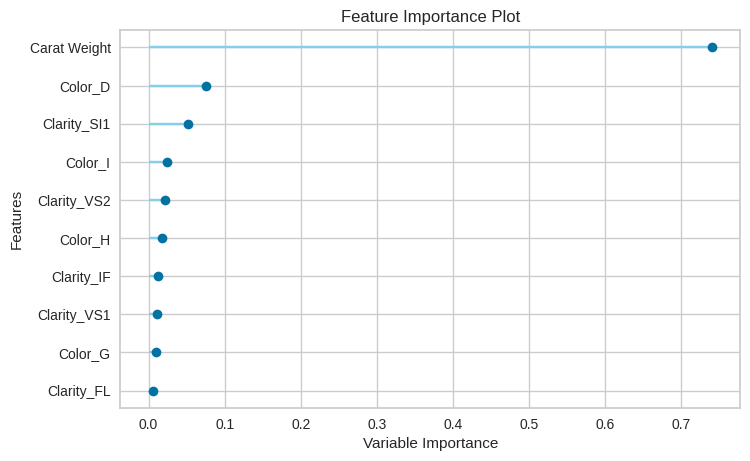

In [22]:
# Plotting the et model with feature importance
plot_model(et, 'feature')

In [12]:
# Prediction accuracy using random forest model
predict_model(rf)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,731.7519,2.762596e+06,1662.1059,0.9717,0.0792,0.0592


,index,Carat Weight,Cut_Fair,Cut_Good,Cut_Ideal,Cut_Signature-Ideal,Cut_Very Good,Color_D,Color_E,Color_F,Color_G,Color_H,Color_I,Clarity_FL,Clarity_IF,Clarity_SI1,Clarity_VS1,Clarity_VS2,Clarity_VVS1,Clarity_VVS2,Polish_EX,Polish_G,Polish_ID,Polish_VG,Symmetry_EX,Symmetry_G,Symmetry_ID,Symmetry_VG,Report_GIA,Price,Label
0,20.0,2.60,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,37621.0,37497.88
1,2272.0,1.28,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,16269.0,13870.97
2,5446.0,0.90,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,4382.0,4105.53
3,4908.0,0.90,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,4523.0,4668.06
4,245.0,1.01,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4727.0,5063.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1616,4932.0,1.00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,9613.0,9807.81
1617,4831.0,1.04,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,7035.0,7106.96
1618,250.0,1.01,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,5078.0,5180.69
1619,615.0,1.26,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,11452.0,13530.95


In [24]:
# Prediction accuracy using extra tree regression model
predict_model(et)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,691.476,1.997791e+06,1413.4322,0.9795,0.0767,0.0581


,index,Carat Weight,Cut_Fair,Cut_Good,Cut_Ideal,Cut_Signature-Ideal,Cut_Very Good,Color_D,Color_E,Color_F,Color_G,Color_H,Color_I,Clarity_FL,Clarity_IF,Clarity_SI1,Clarity_VS1,Clarity_VS2,Clarity_VVS1,Clarity_VVS2,Polish_EX,Polish_G,Polish_ID,Polish_VG,Symmetry_EX,Symmetry_G,Symmetry_ID,Symmetry_VG,Report_GIA,Price,Label
0,20.0,2.60,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,37621.0,36494.46
1,2272.0,1.28,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,16269.0,14473.52
2,5446.0,0.90,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,4382.0,4045.91
3,4908.0,0.90,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,4523.0,4774.48
4,245.0,1.01,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4727.0,5065.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1616,4932.0,1.00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,9613.0,9801.17
1617,4831.0,1.04,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,7035.0,7167.51
1618,250.0,1.01,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,5078.0,5108.26
1619,615.0,1.26,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,11452.0,13806.00


The best accuracy is obtained for the extra tree regression model. Hence finalizing this for deployment.

In [25]:
# Finalizing the model with best accuracy
final_model = finalize_model(et)

Now this model needs to be tested with the test data to know how accuarate it is.

In [26]:
# Predicting on the test data using the finalized data
predictions = predict_model(final_model, data_unseen)
predictions.Label.head()

0    11954.55
1    10994.31
2     5061.12
3    34409.74
4     4176.00
Name: Label, dtype: float64

In [27]:
# Finding the accuracy of the predictions
from pycaret.utils import check_metric
check_metric(data_unseen.Price, predictions.Label, 'R2')

0.9784

The model needs to be saved for further predictions.

In [28]:
save_model(final_model, 'Regression model 20-04-2021')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='Price',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy='...
                  ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0,
                                      criterion='mse', max_depth=None,
                                      max_features='auto', max_leaf_nodes=None,
                                      max_samples=None,
                                    